<a href="https://colab.research.google.com/github/yash3886/MNIST_Project/blob/master/MNIST_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


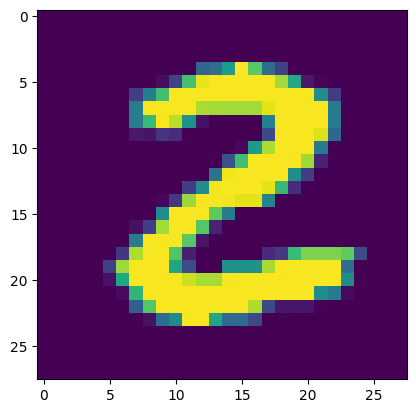

2


In [4]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

In [5]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [6]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [7]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [8]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2924 - accuracy: 0.9155
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1315 - accuracy: 0.9602
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0982 - accuracy: 0.9703
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0787 - accuracy: 0.9754
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0661 - accuracy: 0.9793
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0552 - accuracy: 0.9824
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0487 - accuracy: 0.9844
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0412 - accuracy: 0.9870
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0373 - accuracy: 0.9875
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.033

In [10]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.1103 - accuracy: 0.9715
0.9714999794960022


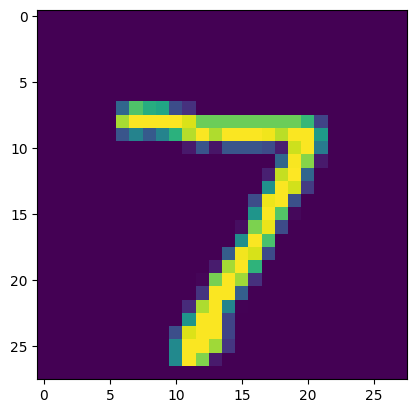

In [11]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [15]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 0s 989us/step


In [16]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [17]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 5, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [18]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 964    0    3    0    0    4    5    1    3    0]
 [   1 1119    5    0    0    1    2    1    6    0]
 [   5    1 1010    2    2    0    2    5    4    1]
 [   1    0    8  972    0   16    0    2    4    7]
 [   0    0    4    0  961    0    5    1    2    9]
 [   2    0    0    9    1  871    5    0    4    0]
 [   5    3    2    1    7    8  930    0    2    0]
 [   1    0   18    5    1    0    0  994    4    5]
 [   6    0    4    8    5   11    3    4  930    3]
 [   2    2    0    3   19   11    0    4    4  964]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

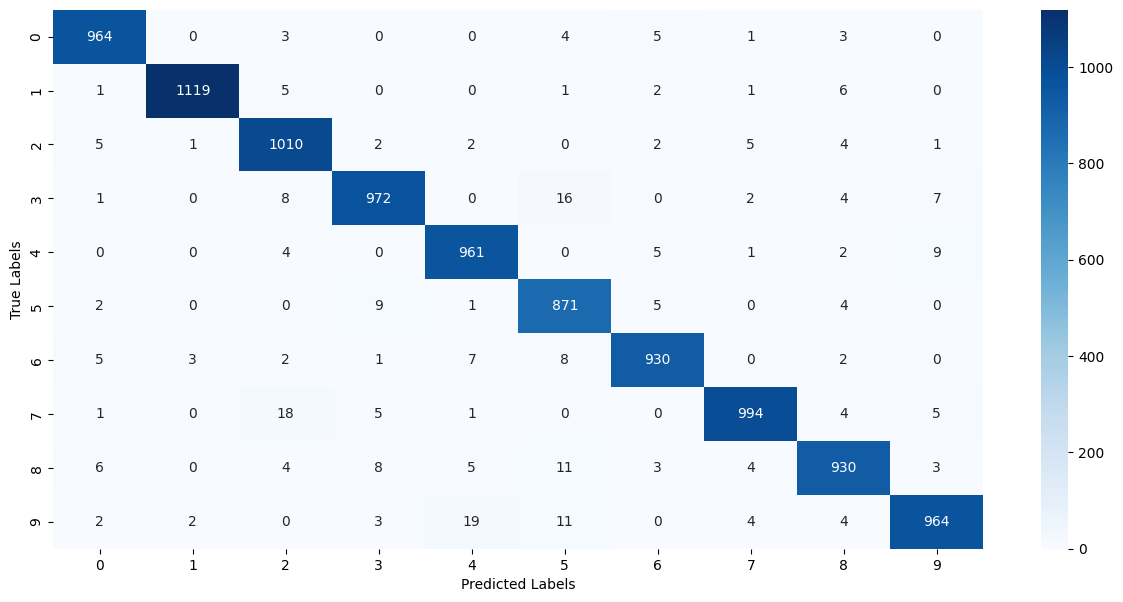

In [19]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [21]:
input_image_path = '/content/3.png'

input_image = cv2.imread(input_image_path)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

1/1 [==============================] - 0s 28ms/step
[[1.5823062e-11 5.3527788e-08 8.7589175e-01 1.0000000e+00 6.4435103e-11
  9.3462592e-01 4.8431864e-13 2.3618659e-05 3.5928071e-02 7.3466687e-03]]
3


Path of the image to be predicted: /content/3.png


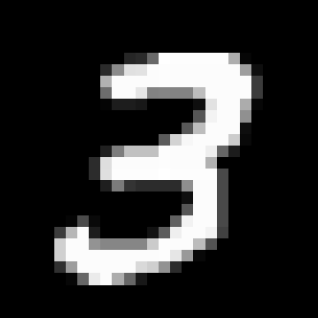

1/1 [==============================] - 0s 17ms/step
The Handwritten Digit is recognised as  3


In [22]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)